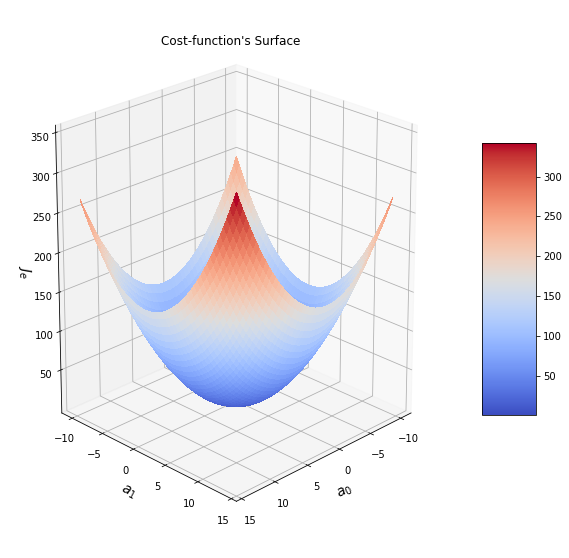

<Figure size 432x288 with 0 Axes>

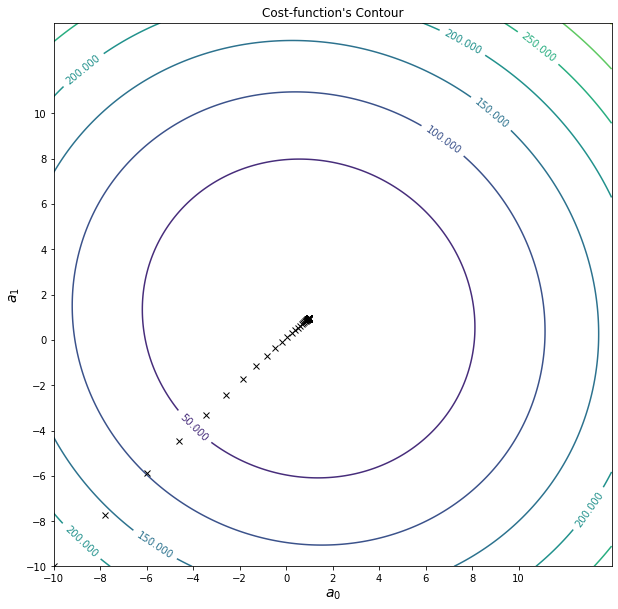

<Figure size 432x288 with 0 Axes>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#GERAR DADOS
M = 1000

x1 = np.random.randn(M,1) #gerando um vetor coluna de 1000 linhas com valores de uma distribuição normal de média 0 e variancia 1
x2 = np.random.randn(M,1) #gerando um vetor coluna de 1000 linhas com valores de uma distribuição normal de média 0 e variancia 1
y = x1 + x2 + np.random.randn(M,1)

#GERANDO VALORES PARA PARAMETROS
N = 200
a1 = np.linspace(-10.0, 14.0, N) #gerando N valores entre -10 e 14 regularmente espaçados
a2 = np.linspace(-10.0, 14.0, N) #gerando N valores entre -10 e 14 regularmente espaçados

A1, A2 = np.meshgrid(a1, a2) #criando o meshgrid

#GERANDO DADOS PARA PLOTAR A FUNÇÃO DE CUSTO
J = np.zeros ((N,N)) #Matriz N por N de zeros
for iter1 in range (0,N):
    for iter2 in range (0,N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1/M)*np.sum (np.square(y - yhat))

#CONCATENAR x1 E x2
X = np.c_[x1,x2]

#PASSO DE APRENDIZAGEM
eta = 0.1

#NÚMERO DE ITERAÇÕES
N_iterations = 1000

#INICIALIZAÇÃO DOS PARÂMETROS
a = np.zeros((2,1)) #vetor coluna de parâmetros inicializados com 0
a[0] = -10 #Atribuição de valor inicial para o passo de aprendizagem
a[1] = -10

#CRIANDO DADOS HISTÓRICOS
a_hist = np.zeros((2,N_iterations + 1))
a_hist[0,0] = a[0]
a_hist[1,0] = a[1]

#GD EM BATELADA
for iteration in range(N_iterations):
    gradients = (-2/M)*X.T.dot(y-X.dot(a))
    a = a - eta * gradients
    a_hist[0, iteration +1] = a[0]
    a_hist[1, iteration +1] = a[1]
    
#PLOTANDO O GRAFICO DA FUNÇÃO DE CUSTO
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# ADICIONANDO A BARRA DE CORES PARA LEGENDA
fig.colorbar(surf, shrink=0.5, aspect=5)

#ADICIONANDO LABELS E TÍTULO
ax.set_xlabel('$a_0$', fontsize=14)
ax.set_ylabel('$a_1$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
ax.view_init(20, 45)
fig

#MOSTRAR A FIGURA
plt.show()

#SALVAR
plt.savefig("superficie_erro_gd_batelada.png", dpi=600)

#PLOTAR CURVA DE NÍVEL
fig = plt.figure(figsize=(10,10))
cp = plt.contour(A1, A2, J)

#ADICIONANDO LABELS E TÍTULO
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=14)
plt.ylabel('$a_1$', fontsize=14)
plt.title('Cost-function\'s Contour')

#ADICIONANDO MARCADORES DE PARÂMETROS
plt.plot(a_hist[0, :], a_hist[1, :], 'kx')

#ARRUMANDO OS INTERVALOS
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))

#MOSTRAR FIGURA
plt.show()

#SALVAR
plt.savefig("grafico_contorno_gd_batelada.png", dpi=600)